### Car Evaluation Database
It is a multi-class classification problem. 
Task is to classify our dataset into **4 classes** : Unacceptable, Acceptable, Good, Very-Good.

### Independent variables 

 1. buying : buying price
 2. maint : maintenance price
 3. doors : number of doors
 4. persons : capacity in terms of persons to carry
 5. lug_boot : the size of luggage boot
 6. safety: estimated safety of the car
 
### Target Variable
 1. Class


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [15]:
data=pd.read_csv(r'C:\Users\Vaibhav\Desktop\BA\Datasets\car_evaluation.csv')

## EDA

In [16]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


### All columns are categorical, check for unique values of each column

In [18]:
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())
    

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


Check how these unique categories are distributed among the columns

In [19]:
for i in data.columns:
    print(data[i].value_counts())
    print()

high     432
low      432
vhigh    432
med      432
Name: buying, dtype: int64

high     432
low      432
vhigh    432
med      432
Name: maint, dtype: int64

5more    432
3        432
2        432
4        432
Name: doors, dtype: int64

more    576
2       576
4       576
Name: persons, dtype: int64

med      576
big      576
small    576
Name: lug_boot, dtype: int64

high    576
low     576
med     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



From above output, it is clear that all the columns except 'class' are distributed equally among data.

#### Class Distribution

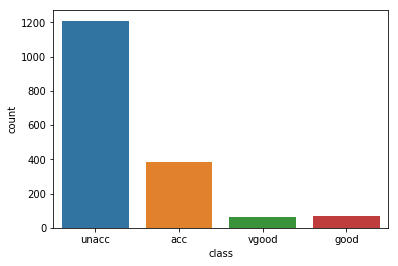

In [20]:
sns.countplot(data['class'])

It can be seen from the graph that the result 'class' is unbalanced with larger values of 'unacc'.
So, this is an unbalanced multiclass classification problem.

**Dummy encoding**

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])
    
#one hot encoding not required

In [24]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


**Correlation matrix**

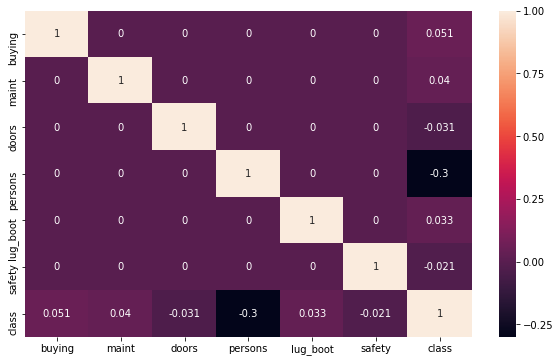

In [25]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

Most of the columns show very weak correlation with 'class'
So, doing any analysis on them may not give any productive output.

In [26]:
X=data[data.columns[:-1]]
y=data['class']

In [27]:
pd.value_counts(y)

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

In [28]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Selection

In [30]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


### 1. Logistic Regression

In [31]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [32]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
pred=logreg.predict(X_test)

In [34]:
logreg.score(X_test,y_test)

0.6647398843930635

Logistic regression model is giving very less accuracy. 
Let's check with other algorithms.

### 2. KNN Classifier


In [35]:
knn=KNeighborsClassifier(n_jobs=-1, metric="manhattan", p=1)
#manhattan distance for factor vars with p (power) = 1 for categorical
#euclidean distance for continuous vars with p = 2 for continuous 

In [36]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.8998073217726397

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       118
           1       0.77      0.53      0.62        19
           2       0.93      0.98      0.96       358
           3       1.00      0.50      0.67        24

    accuracy                           0.90       519
   macro avg       0.88      0.70      0.76       519
weighted avg       0.90      0.90      0.89       519



Accuracy can't be a fair criterion to evaluate unbalanced classification, so check 'f1-score'
f1-score is 0.9 which is better than previous model

In [39]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='f1_macro')
    #scoring technique must not be averaging through binary method
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

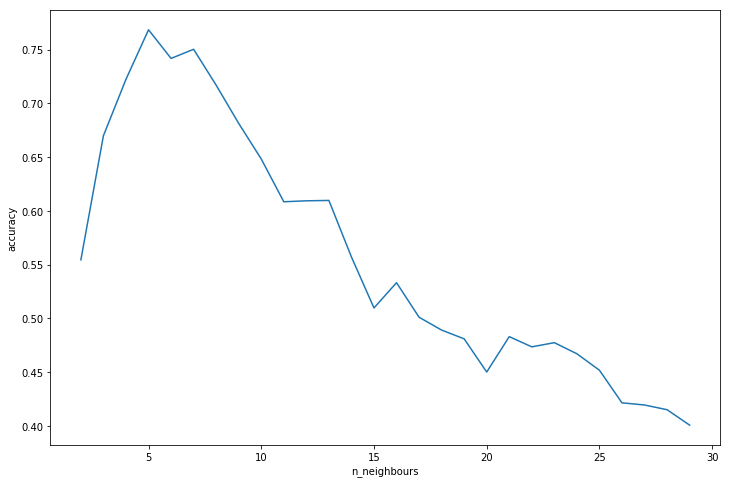

In [40]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))

So, n_neighbours=5 is giving better accuracy as well as f1-score for our data.

So, with KNN Classification algorithm, you were able to achieve accuracy of 90%

### 3.Random Forests Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [ ]:
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test,rfc.predict(X_test),average='micro'))
#A macro-average will compute the metric independently for each class and 
#then take the average (hence treating all classes equally), 
#whereas a micro-average will aggregate the contributions of all classes to compute the average metric.
#so micro-average is like the weighted average.

RFC is providing 95% accuracy

### You can even get higher accuracy for RFC with following parameters:
n_estimators: 50
criterion: entropy
max_depth: 10
max_features: 6
max_leaf_nodes: None